## Connect to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Retreaving the csv

In [3]:
file_path = '/content/drive/MyDrive/DataSets/Pokemon/pokemon.csv'
entire_pokemon_df = pd.read_csv(file_path)
entire_pokemon_df

,name,japanese_name,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,Bulbasaur,フシギダネ (Fushigidane),1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,Ivysaur,フシギソウ (Fushigisou),1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,Venusaur,フシギバナ (Fushigibana),1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,Charmander,ヒトカゲ (Hitokage),0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,Charmeleon,リザード (Lizardo),0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,Celesteela,テッカグヤ (Tekkaguya),0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,Kartana,カミツルギ (Kamiturugi),1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,Guzzlord,アクジキング (Akuziking),2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,Necrozma,ネクロズマ (Necrozma),2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


## Slicing the whole csv to get the needed data

In [4]:
df = entire_pokemon_df[["name", "japanese_name", "type1", "type2", "base_total", "percentage_male", "hp", "attack", "defense", "sp_attack", "sp_defense", "speed", "capture_rate", "generation", "is_legendary"]].copy()

# Convert number to bool
df["legendary"] = df["is_legendary"] == 1
df = df.drop("is_legendary", axis=1)

In [5]:
df.head()

,name,japanese_name,type1,type2,base_total,percentage_male,hp,attack,defense,sp_attack,sp_defense,speed,capture_rate,generation,legendary
0,Bulbasaur,フシギダネ (Fushigidane),grass,poison,318,88.1,45,49,49,65,65,45,45,1,False
1,Ivysaur,フシギソウ (Fushigisou),grass,poison,405,88.1,60,62,63,80,80,60,45,1,False
2,Venusaur,フシギバナ (Fushigibana),grass,poison,625,88.1,80,100,123,122,120,80,45,1,False
3,Charmander,ヒトカゲ (Hitokage),fire,NaN,309,88.1,39,52,43,60,50,65,45,1,False
4,Charmeleon,リザード (Lizardo),fire,NaN,405,88.1,58,64,58,80,65,80,45,1,False


In [6]:
df["percentage_male"] = df["percentage_male"].fillna(0.0)

In [7]:
df.tail()

,name,japanese_name,type1,type2,base_total,percentage_male,hp,attack,defense,sp_attack,sp_defense,speed,capture_rate,generation,legendary
796,Celesteela,テッカグヤ (Tekkaguya),steel,flying,570,0.0,97,101,103,107,101,61,25,7,True
797,Kartana,カミツルギ (Kamiturugi),grass,steel,570,0.0,59,181,131,59,31,109,255,7,True
798,Guzzlord,アクジキング (Akuziking),dark,dragon,570,0.0,223,101,53,97,53,43,15,7,True
799,Necrozma,ネクロズマ (Necrozma),psychic,NaN,600,0.0,97,107,101,127,89,79,3,7,True
800,Magearna,マギアナ (Magearna),steel,fairy,600,0.0,80,95,115,130,115,65,3,7,True


## Working with the data

## Main functions to view the data

In [8]:
df.head()

,name,japanese_name,type1,type2,base_total,percentage_male,hp,attack,defense,sp_attack,sp_defense,speed,capture_rate,generation,legendary
0,Bulbasaur,フシギダネ (Fushigidane),grass,poison,318,88.1,45,49,49,65,65,45,45,1,False
1,Ivysaur,フシギソウ (Fushigisou),grass,poison,405,88.1,60,62,63,80,80,60,45,1,False
2,Venusaur,フシギバナ (Fushigibana),grass,poison,625,88.1,80,100,123,122,120,80,45,1,False
3,Charmander,ヒトカゲ (Hitokage),fire,NaN,309,88.1,39,52,43,60,50,65,45,1,False
4,Charmeleon,リザード (Lizardo),fire,NaN,405,88.1,58,64,58,80,65,80,45,1,False


In [9]:
df.tail()

,name,japanese_name,type1,type2,base_total,percentage_male,hp,attack,defense,sp_attack,sp_defense,speed,capture_rate,generation,legendary
796,Celesteela,テッカグヤ (Tekkaguya),steel,flying,570,0.0,97,101,103,107,101,61,25,7,True
797,Kartana,カミツルギ (Kamiturugi),grass,steel,570,0.0,59,181,131,59,31,109,255,7,True
798,Guzzlord,アクジキング (Akuziking),dark,dragon,570,0.0,223,101,53,97,53,43,15,7,True
799,Necrozma,ネクロズマ (Necrozma),psychic,NaN,600,0.0,97,107,101,127,89,79,3,7,True
800,Magearna,マギアナ (Magearna),steel,fairy,600,0.0,80,95,115,130,115,65,3,7,True


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             801 non-null    object 
 1   japanese_name    801 non-null    object 
 2   type1            801 non-null    object 
 3   type2            417 non-null    object 
 4   base_total       801 non-null    int64  
 5   percentage_male  801 non-null    float64
 6   hp               801 non-null    int64  
 7   attack           801 non-null    int64  
 8   defense          801 non-null    int64  
 9   sp_attack        801 non-null    int64  
 10  sp_defense       801 non-null    int64  
 11  speed            801 non-null    int64  
 12  capture_rate     801 non-null    object 
 13  generation       801 non-null    int64  
 14  legendary        801 non-null    bool   
dtypes: bool(1), float64(1), int64(8), object(5)
memory usage: 88.5+ KB


In [11]:
df.describe()

,base_total,percentage_male,hp,attack,defense,sp_attack,sp_defense,speed,generation
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,428.377029,48.407615,68.958801,77.857678,73.008739,71.305868,70.911361,66.334582,3.690387
std,119.203577,26.216655,26.576015,32.158820,30.769159,32.353826,27.942501,28.907662,1.930420
min,180.000000,0.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000
25%,320.000000,50.000000,50.000000,55.000000,50.000000,45.000000,50.000000,45.000000,2.000000
50%,435.000000,50.000000,65.000000,75.000000,70.000000,65.000000,66.000000,65.000000,4.000000
75%,505.000000,50.000000,80.000000,100.000000,90.000000,91.000000,90.000000,85.000000,5.000000
max,780.000000,100.000000,255.000000,185.000000,230.000000,194.000000,230.000000,180.000000,7.000000


In [12]:
df["legendary"].value_counts()

,count
legendary,
False,731
True,70


## Methods to search and filter

In [13]:
## First and most used
df[df['attack'] > 150] # easy and fast, makes a boolean series
# df[(df['attack'] > 140) & (df['type'] == 'Fire')] # Can do AND, OR, NOT operations
# df[~(df['type'] == 'Fire')]

,name,japanese_name,type1,type2,base_total,percentage_male,hp,attack,defense,sp_attack,sp_defense,speed,capture_rate,generation,legendary
126,Pinsir,カイロス (Kailios),bug,NaN,600,50.0,65,155,120,65,90,105,45,1,False
129,Gyarados,ギャラドス (Gyarados),water,flying,640,50.0,95,155,109,70,130,81,45,1,False
213,Heracross,ヘラクロス (Heracros),bug,fighting,600,50.0,80,185,115,40,105,75,45,2,False
247,Tyranitar,バンギラス (Bangiras),rock,dark,700,50.0,100,164,150,95,120,71,45,2,False
256,Blaziken,バシャーモ (Bursyamo),fire,fighting,630,88.1,80,160,80,130,80,100,45,3,False
288,Slaking,ケッキング (Kekking),normal,NaN,670,50.0,150,160,100,95,65,100,45,3,False
353,Banette,ジュペッタ (Juppeta),ghost,NaN,555,50.0,64,165,75,93,83,75,45,3,False
382,Groudon,グラードン (Groudon),ground,NaN,770,0.0,100,180,160,150,90,90,3,3,True
383,Rayquaza,レックウザ (Rayquaza),dragon,flying,780,0.0,105,180,100,180,100,115,45,3,True
408,Rampardos,ラムパルド (Rampald),rock,NaN,495,88.1,97,165,60,65,50,58,45,4,False


In [14]:
## WIth `.loc[]`
# df.loc[df["attack"] > 150] # these filters more
df.loc[df["attack"] > 150, ['name', 'japanese_name', 'attack']].shape[0] # more flexible
# shape gives the dimention of the df like in this case 16x3
# df.loc[(df['attack'] > 150) & (df['type'] == 'Fire')] # can do AND, OR, NOT operations

16

In [15]:
## With `.query()`
# String based, but needs `@` if we want top include variables from outside the df
df.query("attack > 150")
# df.query('attack > 150 and type == "Fire"') # Can also do AND, OR, NOT operations

,name,japanese_name,type1,type2,base_total,percentage_male,hp,attack,defense,sp_attack,sp_defense,speed,capture_rate,generation,legendary
126,Pinsir,カイロス (Kailios),bug,NaN,600,50.0,65,155,120,65,90,105,45,1,False
129,Gyarados,ギャラドス (Gyarados),water,flying,640,50.0,95,155,109,70,130,81,45,1,False
213,Heracross,ヘラクロス (Heracros),bug,fighting,600,50.0,80,185,115,40,105,75,45,2,False
247,Tyranitar,バンギラス (Bangiras),rock,dark,700,50.0,100,164,150,95,120,71,45,2,False
256,Blaziken,バシャーモ (Bursyamo),fire,fighting,630,88.1,80,160,80,130,80,100,45,3,False
288,Slaking,ケッキング (Kekking),normal,NaN,670,50.0,150,160,100,95,65,100,45,3,False
353,Banette,ジュペッタ (Juppeta),ghost,NaN,555,50.0,64,165,75,93,83,75,45,3,False
382,Groudon,グラードン (Groudon),ground,NaN,770,0.0,100,180,160,150,90,90,3,3,True
383,Rayquaza,レックウザ (Rayquaza),dragon,flying,780,0.0,105,180,100,180,100,115,45,3,True
408,Rampardos,ラムパルド (Rampald),rock,NaN,495,88.1,97,165,60,65,50,58,45,4,False


### Exercises

In [16]:
## Select in a new df the pokemons which speed is <= 10
slow_speed_pokemon = df[df["speed"] <= 10]
# slow_speed_pokemon = df.loc[df["speed"] <= 10]
# slow_speed_pokemon = df.query("speed <= 10")
slow_speed_pokemon.head()

,name,japanese_name,type1,type2,base_total,percentage_male,hp,attack,defense,sp_attack,sp_defense,speed,capture_rate,generation,legendary
212,Shuckle,ツボツボ (Tsubotsubo),bug,rock,505,50.0,20,10,230,10,230,5,190,2,False
327,Trapinch,ナックラー (Nuckrar),ground,NaN,290,50.0,45,100,45,45,45,10,255,3,False
437,Bonsly,ウソハチ (Usohachi),rock,NaN,290,50.0,50,80,95,10,45,10,255,4,False
445,Munchlax,ゴンベ (Gonbe),normal,NaN,390,88.1,135,85,40,40,85,5,50,4,False
596,Ferroseed,テッシード (Tesseed),grass,steel,305,50.0,44,50,91,24,86,10,255,5,False


In [17]:
## How many pokemons have sp. def 25 or below
df.loc[df["sp_defense"] <= 25].shape[0]

17

In [18]:
## Save just the legendary pokemons
legendary_pokemon = df.loc[df["legendary"] == True]
# Another way is just `df.loc[df["legendary"]]` displays all the True valued legendary
# and for displaying the non legendary `df.loc[~df["legendary"]]`
legendary_pokemon.head()

,name,japanese_name,type1,type2,base_total,percentage_male,hp,attack,defense,sp_attack,sp_defense,speed,capture_rate,generation,legendary
143,Articuno,フリーザー (Freezer),ice,flying,580,0.0,90,85,100,95,125,85,3,1,True
144,Zapdos,サンダー (Thunder),electric,flying,580,0.0,90,90,85,125,90,100,3,1,True
145,Moltres,ファイヤー (Fire),fire,flying,580,0.0,90,100,90,125,85,90,3,1,True
149,Mewtwo,ミュウツー (Mewtwo),psychic,NaN,780,0.0,106,150,70,194,120,140,3,1,True
150,Mew,ミュウ (Mew),psychic,NaN,600,0.0,100,100,100,100,100,100,45,1,True


## Advanced selection

In [19]:
## First way
(
    (df["type1"] == "fire") &
    (df["type2"] == "flying")
).sum()

np.int64(6)

In [20]:
## Second way with `.loc[]`
df.loc[(
    (df["type1"] == "fire") &
    (df["type2"] == "flying")
)]

,name,japanese_name,type1,type2,base_total,percentage_male,hp,attack,defense,sp_attack,sp_defense,speed,capture_rate,generation,legendary
5,Charizard,リザードン (Lizardon),fire,flying,634,88.1,78,104,78,159,115,100,45,1,False
145,Moltres,ファイヤー (Fire),fire,flying,580,0.0,90,100,90,125,85,90,3,1,True
249,Ho-Oh,ホウオウ (Houou),fire,flying,680,0.0,106,130,90,110,154,90,3,2,True
661,Fletchinder,ヒノヤコマ (Hinoyakoma),fire,flying,382,50.0,62,73,55,56,52,84,120,6,False
662,Talonflame,ファイアロー (Fiarrow),fire,flying,499,50.0,78,81,71,74,69,126,45,6,False
740,Oricorio,(pachipachi Style)オドリドリ (Odoridori),fire,flying,476,24.6,75,70,70,98,70,93,45,7,False


In [21]:
## Third way with `.query()`
df.query("`type1` == 'fire' and `type2` == 'flying'")
# For the column names with more than one words use ` (backticks), for the value if its string use ' (single quote)

,name,japanese_name,type1,type2,base_total,percentage_male,hp,attack,defense,sp_attack,sp_defense,speed,capture_rate,generation,legendary
5,Charizard,リザードン (Lizardon),fire,flying,634,88.1,78,104,78,159,115,100,45,1,False
145,Moltres,ファイヤー (Fire),fire,flying,580,0.0,90,100,90,125,85,90,3,1,True
249,Ho-Oh,ホウオウ (Houou),fire,flying,680,0.0,106,130,90,110,154,90,3,2,True
661,Fletchinder,ヒノヤコマ (Hinoyakoma),fire,flying,382,50.0,62,73,55,56,52,84,120,6,False
662,Talonflame,ファイアロー (Fiarrow),fire,flying,499,50.0,78,81,71,74,69,126,45,6,False
740,Oricorio,(pachipachi Style)オドリドリ (Odoridori),fire,flying,476,24.6,75,70,70,98,70,93,45,7,False


### Exercises

In [22]:
## How many poison types are across bot types (Either Type 1 has or Type 2 has)
df.loc[(
    (df["type1"] == "poison") |
    (df["type2"] == "poison")
)]

# df.query("`type1` == 'poison' or `type2` == 'poison'")

# (
#     (df["type1"] == "poison") |
#     (df["type2"] == "poison")
# )

,name,japanese_name,type1,type2,base_total,percentage_male,hp,attack,defense,sp_attack,sp_defense,speed,capture_rate,generation,legendary
0,Bulbasaur,フシギダネ (Fushigidane),grass,poison,318,88.1,45,49,49,65,65,45,45,1,False
1,Ivysaur,フシギソウ (Fushigisou),grass,poison,405,88.1,60,62,63,80,80,60,45,1,False
2,Venusaur,フシギバナ (Fushigibana),grass,poison,625,88.1,80,100,123,122,120,80,45,1,False
12,Weedle,ビードル (Beedle),bug,poison,195,50.0,40,35,30,20,20,50,255,1,False
13,Kakuna,コクーン (Cocoon),bug,poison,205,50.0,45,25,50,25,25,35,120,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,Mareanie,ヒドイデ (Hidoide),poison,water,305,50.0,50,53,62,43,52,45,190,7,False
747,Toxapex,ドヒドイデ (Dohidoide),poison,water,495,50.0,50,63,152,53,142,35,75,7,False
756,Salandit,ヤトウモリ (Yatoumori),poison,fire,320,88.1,48,44,40,71,40,77,120,7,False
757,Salazzle,エンニュート (Ennewt),poison,fire,480,0.0,68,64,60,111,60,117,45,7,False


In [23]:
## Which pokemon from type1 "Ice" has the strongest defense
# df.loc[df["type1"] == "ice"].sort_values(by="defense", ascending=False).head()
df.loc[df["type1"] == "ice", "defense"].max()

184

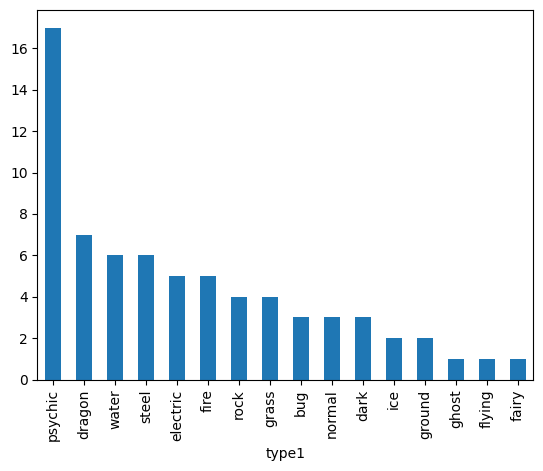

In [24]:
## Most common type of legendary pokemon
df.loc[df["legendary"] == True].value_counts("type1")
df.loc[df["legendary"] == True, "type1"].value_counts().plot(kind="bar");

In [25]:
## Find the most powerful pokemon from the first 3 generations of type water
df.loc[(
    (df["type1"] == "water") &
    (df["generation"] <= 3) # same as `df["generation"].isin([1, 2, 3])`
), ["name", "base_total"]].max().head(1)

,0
name,Wooper


In [47]:
## Whats the most powerful dragon from from last 2 generations
df.loc[
    (
      (df["type1"] == "dragon") |
      (df["type2"] == "dragon")
    ) &

    (
        df["generation"].isin({5, 6})
    ),

    ["name", "japanese_name", "type1", "type2", "base_total", "generation"]
].sort_values("base_total", ascending=False).head(1)



## With `query`
df.query(
    "(`type1` == 'dragon' or `type2` == 'dragon') and `generation` in [5, 6]"
).sort_values("base_total", ascending=False).head(1)

,name,japanese_name,type1,type2,base_total,percentage_male,hp,attack,defense,sp_attack,sp_defense,speed,capture_rate,generation,legendary
717,Zygarde,(10% Forme)ジガルデ (Zygarde),dragon,ground,708,0.0,216,100,121,91,95,85,3,6,True


In [46]:
## Whats the most powerful `fire` type1 pokemons with `attack` > 100
df.loc[(
    (df["type1"] == "fire") &
    (df["attack"] > 100)
)].sort_values("base_total", ascending=False).head(1)


## With `query`
df.query(
    "`type1` == 'fire' and `attack` > 100"
).sort_values("base_total", ascending=False).head(1)

,name,japanese_name,type1,type2,base_total,percentage_male,hp,attack,defense,sp_attack,sp_defense,speed,capture_rate,generation,legendary
249,Ho-Oh,ホウオウ (Houou),fire,flying,680,0.0,106,130,90,110,154,90,3,2,True


In [48]:
## Select all water type, flying type pokemons
df.loc[
    (df["type1"] == "water") &
    (df["type2"] == "flying")
]

,name,japanese_name,type1,type2,base_total,percentage_male,hp,attack,defense,sp_attack,sp_defense,speed,capture_rate,generation,legendary
129,Gyarados,ギャラドス (Gyarados),water,flying,640,50.0,95,155,109,70,130,81,45,1,False
225,Mantine,マンタイン (Mantain),water,flying,485,50.0,85,40,70,80,140,70,25,2,False
277,Wingull,キャモメ (Camome),water,flying,270,50.0,40,30,30,55,30,85,190,3,False
278,Pelipper,ペリッパー (Pelipper),water,flying,440,50.0,60,50,100,95,70,65,45,3,False
457,Mantyke,タマンタ (Tamanta),water,flying,345,50.0,45,20,50,60,120,50,25,4,False
579,Ducklett,コアルヒー (Koaruhie),water,flying,305,50.0,62,44,50,44,50,55,190,5,False
580,Swanna,スワンナ (Swanna),water,flying,473,50.0,75,87,63,87,63,98,45,5,False


In [52]:
## Select legendary pokemons with columns: , from type1 fire
df.loc[
    (df["type1"] == "fire") &
    (df["legendary"]),
    ["name", "japanese_name", "attack", "generation"]
]

,name,japanese_name,attack,generation
145,Moltres,ファイヤー (Fire),100,1
243,Entei,エンテイ (Entei),115,2
249,Ho-Oh,ホウオウ (Houou),130,2
484,Heatran,ヒードラン (Heatran),90,4
720,Volcanion,ボルケニオン (Volcanion),110,6


In [60]:
## Select slow and fast pokemons
bottom_5 = df["speed"].quantile(.05)
top_5 = df["speed"].quantile(.95)

print(bottom_5, top_5)


df.loc[
    (df["speed"] <= bottom_5) |
    (df["speed"] >= top_5)
]

df.query(
    "speed < @bottom_5 | speed > @top_5"
)

25.0 115.0


,name,japanese_name,type1,type2,base_total,percentage_male,hp,attack,defense,sp_attack,sp_defense,speed,capture_rate,generation,legendary
14,Beedrill,スピアー (Spear),bug,poison,495,50.0,65,150,40,15,80,145,45,1,False
17,Pidgeot,ピジョット (Pigeot),normal,flying,579,50.0,83,80,80,135,80,121,45,1,False
38,Jigglypuff,プリン (Purin),normal,fairy,270,24.6,115,45,20,45,25,20,170,1,False
64,Alakazam,フーディン (Foodin),psychic,NaN,600,75.4,55,50,65,175,105,150,50,1,False
73,Geodude,イシツブテ (Isitsubute),rock,ground,300,50.0,40,80,100,30,30,20,255,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,Sandygast,スナバァ (Sunaba),ghost,ground,320,50.0,55,55,80,70,45,15,140,7,False
770,Pyukumuku,ナマコブシ (Namakobushi),water,NaN,410,50.0,55,60,130,30,130,5,60,7,False
773,Minior,メテノ (Meteno),rock,flying,500,0.0,60,100,60,100,60,120,30 (Meteorite)255 (Core),7,False
784,Tapu Koko,カプ・コケコ (Kapu-kokeko),electric,fairy,570,0.0,70,115,85,95,75,130,3,7,True


## Sorting

In [26]:
## Sorting by one criteria
df.sort_values(by="attack", ascending=False)
# by "..." -> the columns which the sorting will occur
# ascending True -> from low to high, and False -> from high to low

,name,japanese_name,type1,type2,base_total,percentage_male,hp,attack,defense,sp_attack,sp_defense,speed,capture_rate,generation,legendary
213,Heracross,ヘラクロス (Heracros),bug,fighting,600,50.0,80,185,115,40,105,75,45,2,False
797,Kartana,カミツルギ (Kamiturugi),grass,steel,570,0.0,59,181,131,59,31,109,255,7,True
383,Rayquaza,レックウザ (Rayquaza),dragon,flying,780,0.0,105,180,100,180,100,115,45,3,True
382,Groudon,グラードン (Groudon),ground,NaN,770,0.0,100,180,160,150,90,90,3,3,True
444,Garchomp,ガブリアス (Gaburias),dragon,ground,700,50.0,108,170,115,120,95,92,45,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Shuckle,ツボツボ (Tsubotsubo),bug,rock,505,50.0,20,10,230,10,230,5,190,2,False
241,Blissey,ハピナス (Happinas),normal,NaN,540,0.0,255,10,10,75,135,55,30,2,False
128,Magikarp,コイキング (Koiking),water,NaN,200,50.0,20,10,55,15,20,80,255,1,False
439,Happiny,ピンプク (Pinpuku),normal,NaN,220,0.0,100,5,5,15,65,30,130,4,False


In [27]:
## Sorting my miltiple criteria
df.sort_values(by=["attack", "defense"], ascending=[False, True])

,name,japanese_name,type1,type2,base_total,percentage_male,hp,attack,defense,sp_attack,sp_defense,speed,capture_rate,generation,legendary
213,Heracross,ヘラクロス (Heracros),bug,fighting,600,50.0,80,185,115,40,105,75,45,2,False
797,Kartana,カミツルギ (Kamiturugi),grass,steel,570,0.0,59,181,131,59,31,109,255,7,True
383,Rayquaza,レックウザ (Rayquaza),dragon,flying,780,0.0,105,180,100,180,100,115,45,3,True
382,Groudon,グラードン (Groudon),ground,NaN,770,0.0,100,180,160,150,90,90,3,3,True
444,Garchomp,ガブリアス (Gaburias),dragon,ground,700,50.0,108,170,115,120,95,92,45,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,Blissey,ハピナス (Happinas),normal,NaN,540,0.0,255,10,10,75,135,55,30,2,False
128,Magikarp,コイキング (Koiking),water,NaN,200,50.0,20,10,55,15,20,80,255,1,False
212,Shuckle,ツボツボ (Tsubotsubo),bug,rock,505,50.0,20,10,230,10,230,5,190,2,False
112,Chansey,ラッキー (Lucky),normal,NaN,450,0.0,250,5,5,35,105,50,30,1,False


### Exercises

In [64]:
## Find the legendary pokemon with strong attack and defense

df.loc[
    df["legendary"]
].sort_values(by=["attack", "defense"], ascending=False)

,name,japanese_name,type1,type2,base_total,percentage_male,hp,attack,defense,sp_attack,sp_defense,speed,capture_rate,generation,legendary
797,Kartana,カミツルギ (Kamiturugi),grass,steel,570,0.0,59,181,131,59,31,109,255,7,True
382,Groudon,グラードン (Groudon),ground,NaN,770,0.0,100,180,160,150,90,90,3,3,True
383,Rayquaza,レックウザ (Rayquaza),dragon,flying,780,0.0,105,180,100,180,100,115,45,3,True
485,Regigigas,レジギガス (Regigigas),normal,NaN,670,0.0,110,160,110,80,110,100,3,4,True
718,Diancie,ディアンシー (Diancie),rock,fairy,700,0.0,50,160,110,160,110,110,3,6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,Cresselia,クレセリア (Cresselia),psychic,NaN,600,0.0,120,70,120,75,130,85,3,4,True
792,Nihilego,ウツロイド (Uturoid),rock,poison,570,0.0,109,53,47,127,131,103,45,7,True
377,Regice,レジアイス (Regice),ice,NaN,580,0.0,80,50,100,100,200,50,3,3,True
789,Cosmoem,コスモウム (Cosmovum),psychic,NaN,400,0.0,43,29,131,29,131,37,45,7,True
